# [Exp-09]Segmentation

## 라이브러리 불러오기

In [1]:
!pip install numpy==1.21
!pip install tensorflow-gpu==2.4.0 keras==2.4.0
!pip install pixellib
!pip install Pillow==8.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires pillow!=8.3.*,>=5.3.0, but you have pillow 8.3.2 which is incompatible.
thinc 8.1.0 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.3.0 which is incompatible.
tensorflow 2.4.4 requires numpy~=1.19.2, but you have numpy 1.21.0 which is incompatible.
tensorflow 2.4.4 requires typing-extensions~=3.7.4, but you have typing-extensions 4.3.0 which is incompatible.
tensorflow-gpu 2.4.0 requires n

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.3.0
    Uninstalling typing-extensions-4.3.0:
      Successfully uninstalled typing-extensions-4.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
torchvision 0.13.1+cu113 requires pillow!=8.3.*,>=5.3.0, but you have pillow 8.3.2 which is incompatible.
cmdstanpy 1.0.4 requires numpy>=1.21, bu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
torchvision 0.13.1+cu113 requires pillow!=8.3.*,>=5.3.0, but you have pillow 8.3.2 which is incompatible.
thinc 8.1.0 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.3.0 which is incompatible.
tensorflow 2.4.4 requires typing-extensions~=3.7.4, but you have typing-extensions 4.3.0 which is incompatible.
tensorflo

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import os
import urllib
import cv2
import numpy as np
import pixellib
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print(cv2.__version__)

4.6.0


## 사진을 준비하자.

* 이미지 표시 함수

In [4]:
def showOutput(img_list):
  img_num = len(img_list)
  fig, axes = plt.subplots(img_num, figsize = (14,10))
  for i in range(img_num):
    axes[i].set_yticks([])
    axes[i].set_xticks([])
    axes[i].imshow(img_list[i])

In [5]:
def showImage(img_list):
  img_num = len(img_list)
  fig, axes = plt.subplots(img_num, figsize = (img_num*7,img_num*5))
  if img_num == 1:
      axes.set_yticks([])
      axes.set_xticks([])
      axes.imshow(cv2.cvtColor(img_list[0], cv2.COLOR_BGR2RGB))
  else:
    for i in range(img_num):
      axes[i].set_yticks([])
      axes[i].set_xticks([])
      axes[i].imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))

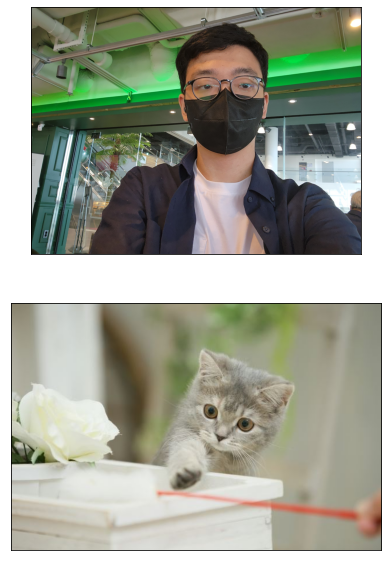

In [6]:
my_img_path = '/content/drive/MyDrive/Exploration/9_Submit/data/myImage.jpg'
cat_img_path = '/content/drive/MyDrive/Exploration/9_Submit/data/cat.jpg'
my_image = cv2.imread(my_img_path)
cat_image = cv2.imread(cat_img_path)

imgs_original = [my_image, cat_image]

showImage(imgs_original)


## 모델을 준비하자.

In [7]:
model_dir = '/content/drive/MyDrive/Exploration/9_Submit/model'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/Exploration/9_Submit/model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f244f32c850>)

In [8]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

## 모델 적용

### 모델이 적용된 결과를 출력해봅시다.

In [9]:
segvalues_myImage, output_myImage = model.segmentAsPascalvoc(my_img_path)
segvalues_cat, output_cat = model.segmentAsPascalvoc(cat_img_path)

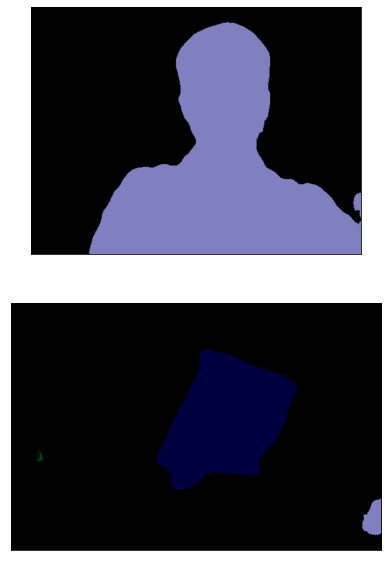

In [10]:
output_list =[output_myImage, output_cat]
showOutput(output_list)

### Label 확인

In [11]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
print('My :')
for class_id in segvalues_myImage['class_ids']:
    print(LABEL_NAMES[class_id])
print('\nCat :')
for class_id in segvalues_cat['class_ids']:
    print(LABEL_NAMES[class_id])

My :
background
person

Cat :
background
cat
person
pottedplant


### 색상확인 및 마스크 만들기

In [12]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

# colormap[:20]

* 사람은 15
* 고양이는 8

In [13]:
print(colormap[15])
print(colormap[8])

[192 128 128]
[64  0  0]


In [14]:
seg_color_myImage = (128,128,192)
seg_color_cat = (0,0,64)

In [15]:
seg_map_myImage = np.all(output_myImage == seg_color_myImage, axis = -1)
seg_map_cat = np.all(output_cat == seg_color_cat, axis = -1)
mask_myImage = seg_map_myImage.astype(np.uint8)*255
mask_cat = seg_map_cat.astype(np.uint8)*255

마스크  
* mask_myImage  
* mask_cat

## 흐린 배경 만들기

* 인물 사진은 흐림 강도를 강하게 줬습니다.

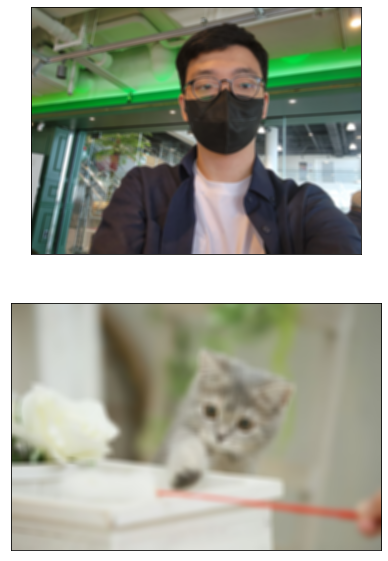

In [16]:
my_image_blur = cv2.blur(my_image, (30,30))
cat_image_blur = cv2.blur(cat_image, (13,13))

img_blur = [my_image_blur, cat_image_blur]
showImage(img_blur)

blur 이미지
* my_image_blur
* cat_image_blur

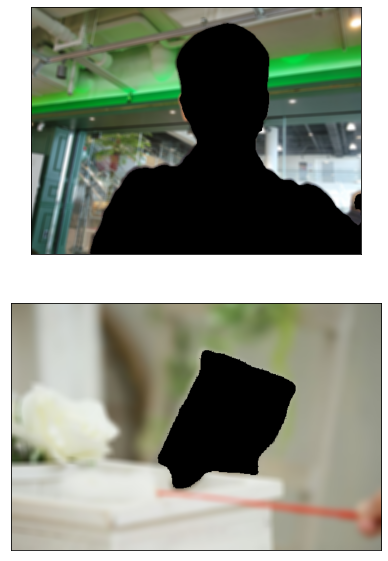

In [17]:
mask_myImage_color = cv2.cvtColor(mask_myImage, cv2.COLOR_GRAY2BGR)
mask_cat_color = cv2.cvtColor(mask_cat, cv2.COLOR_GRAY2BGR)

img_bg_mask_myImage = cv2.bitwise_not(mask_myImage_color)
img_bg_mask_cat = cv2.bitwise_not(mask_cat_color)

img_bg_blur_myImage = cv2.bitwise_and(my_image_blur, img_bg_mask_myImage)
img_bg_blur_cat = cv2.bitwise_and(cat_image_blur, img_bg_mask_cat)

img_bg = [img_bg_blur_myImage, img_bg_blur_cat]
showImage(img_bg)

## 이미지 합성

* 원본
  - my_image
  - cat_image
* 마스크(컬러)
  - mask_myImage_color  
  - mask_cat_color
* 배경
  - img_bg_blur_myImage
  - img_bg_blur_cat



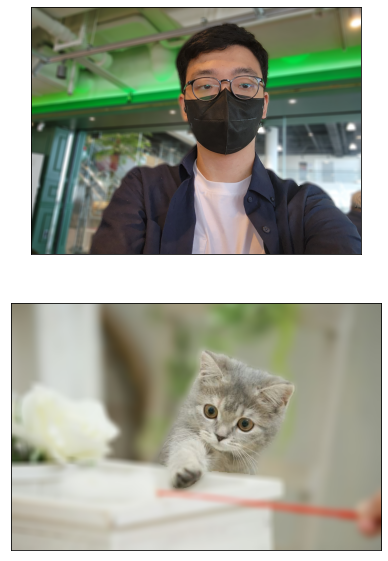

In [18]:
my_image_plusBlur = np.where(mask_myImage_color == 255, my_image, img_bg_blur_myImage)
cat_image_plusBlur = np.where(mask_cat_color == 255, cat_image, img_bg_blur_cat)

plusBlur = [my_image_plusBlur, cat_image_plusBlur]
showImage(plusBlur)

## 크로마키 만들기

1. 같은 크기의 numpy array를 만들어 주되 (0,255,0) 으로 만들어줍니다.
* datatype을 np.uint8로 정해주지 않으면 error가 발생합니다.

(2208, 2944, 3)


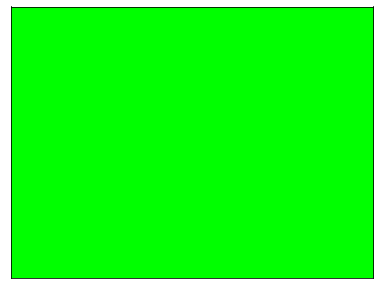

In [19]:
print(my_image.shape)
chroma_key = np.full((2208,2944,3), [0,255,0], dtype = np.uint8)
show_chroma = [chroma_key]
showImage(show_chroma)

2. 크로마와 원본 합성

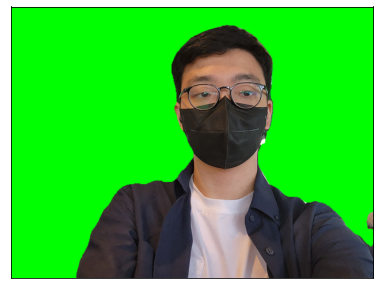

In [20]:
my_image_chroma = np.where(mask_myImage_color == 255, my_image, chroma_key)
show_img_chroma = [my_image_chroma]
showImage(show_img_chroma)

3. 다른 배경 넣기

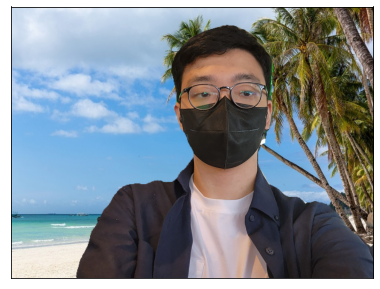

In [21]:
img_beach = cv2.imread('/content/drive/MyDrive/Exploration/9_Submit/data/beach.jpg')
img_beach = cv2.resize(img_beach, (2944,2208))
my_image_beach = np.where(mask_myImage_color == 255, my_image, img_beach)
show_img_beach = [my_image_beach]
showImage(show_img_beach)

## 문제점 파악

* 초록 배경 크로마키가 적용된 사진을 통해 문제점을 파악해보았습니다.

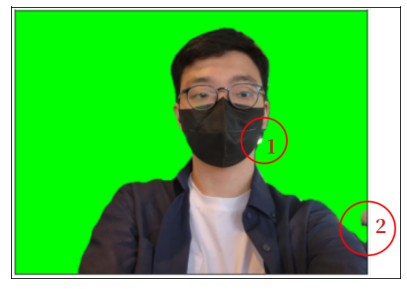

In [22]:
img_problem = cv2.imread('/content/drive/MyDrive/Exploration/9_Submit/data/myImage_problem.png')
show_problem = [img_problem]
showImage(show_problem)

1. 사람 옆에 흰색 부분이 같이 잡혔습니다.
2. 뒤에 있는 작게 표시된 사람까지 잡혔습니다.

1번 문제의 경우
* [pixellib](https://github.com/ayoolaolafenwa/PixelLib) 사이트에 있는 [PointRend](https://github.com/facebookresearch/detectron2/tree/main/projects/PointRend)를 적용합니다.(단 instance와 연계되는 것 같습니다.)
* 픽셀값이 segmentation 잡은 곳에서 샘플링의 밀도를 바꾸는 것 입니다.



PointRend(point에 기반한 렌더링)
* 픽셀 중에서 이웃 값과 달라질 가능성이 높은 픽셀만 고해상도로 계산한다.


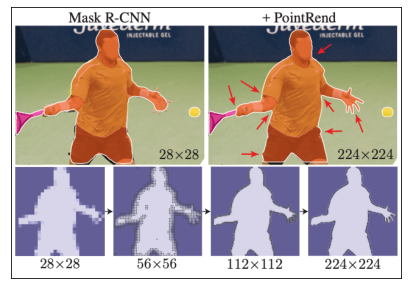

In [23]:
pointRend = cv2.imread('/content/drive/MyDrive/Exploration/9_Submit/data/PointRend.png')
showImage([pointRend])

* 위 그림은 기존의 Instance segmentation 중 하나인 Mask R-CNN만 사용하였을 때와  
  PointRend를 같이 사용하였을 경우를 나타낸 것 입니다.
* 기존의 CNN은 regular gird를 사용하여 객체 경계를 undersampling 하면서 매끄러운 영역은 불필요하게 oversampling합니다.
* 그 결과로 왼쪽 그림 같이 잡히게 됩니다.
* 그래서 PointRend라는 세분화 전략을 사용해 non-uniform set를 적응적으로 선택하여 라벨 계산을 하는 다른 신경망 모듈을 추가로 사용합니다.
* PointLend는 전부 다 계산하는 것이 아니고 딱 정해진 점들만 예측합니다.

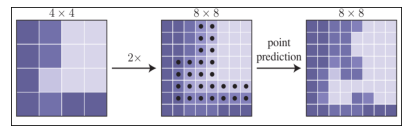

In [24]:
pointRend2 = cv2.imread('/content/drive/MyDrive/Exploration/9_Submit/data/PointRend2.png')
showImage([pointRend2])

* PointLend는 크게 3가지 부분으로 나눕니다.
1. adaptive subdivision 기술로 계산할 몇개의 점을 고릅니다.  
   (adaptive subdivision : 고해상도 이미지를 쉽게 계산하기 위한 방법으로써 neighbor와 값이 급격하게 다른 부분들만 계산하는 기술입니다.)
2. 고른 점들의 feature를 뽑아냅니다. Feature들은 해당 regular gird에서 4 nearest neighbor을 통해 선형보간합니다.
3. 작은 뉴런 네트워크가 각 점에서 point-wise feature를 통해 라벨을 예측합니다.

* github도 따로 있고 pixellib에서도 소개된 만큼 직접 써보고 싶었지만  
두군데 모두 pytorch 기반으로만 설명하고 코드가 있어서 적용은 보류하겠습니다.

2번 문제의 경우  
* semantic segmentation 대신 [instance segmentation](https://pixellib.readthedocs.io/en/latest/Image_instance.html)을 적용합니다.
* semantic 은 모든 사람을 하나로 표현하는 반면
* instance 는 사람 개개인별로 다른 라벨을 가지기 때문에 2명의 객체로 분할 될 것 입니다. 
* 2명의 객체 중 저에 해당하는 부분만 마스크를 잡는 방법을 사용하면 될 것 같습니다.

In [25]:
import pixellib
from pixellib.instance import instance_segmentation

segment_image = instance_segmentation()
segment_image.load_model("/content/drive/MyDrive/Exploration/9_Submit/model/mask_rcnn_coco.h5")

segment_image.segmentImage("/content/drive/MyDrive/Exploration/9_Submit/data/myImage.jpg", 
                           output_image_name = "/content/drive/MyDrive/Exploration/9_Submit/data/myImage_inSeg.jpg")

segment_image.segmentImage("/content/drive/MyDrive/Exploration/9_Submit/data/cat.jpg", 
                           output_image_name = "/content/drive/MyDrive/Exploration/9_Submit/data/cat_inSeg.jpg")

Instructions for updating:
Use fn_output_signature instead
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.


({'rois': array([[ 84, 243, 325, 493],
         [323, 591, 412, 639],
         [265,  12, 410, 464]], dtype=int32),
  'class_ids': array([16,  1, 74], dtype=int32),
  'scores': array([0.9995432 , 0.90716153, 0.8087056 ], dtype=float32),
  'masks': array([[[False, False, False],
          [False, False, False],
          [False, False, False],
          ...,
          [False, False, False],
          [False, False, False],
          [False, False, False]],
  
         [[False, False, False],
          [False, False, False],
          [False, False, False],
          ...,
          [False, False, False],
          [False, False, False],
          [False, False, False]],
  
         [[False, False, False],
          [False, False, False],
          [False, False, False],
          ...,
          [False, False, False],
          [False, False, False],
          [False, False, False]],
  
         ...,
  
         [[False, False, False],
          [False, False, False],
          [False, Fa

* instance segmentation이 적용된 사진을 보겠습니다.

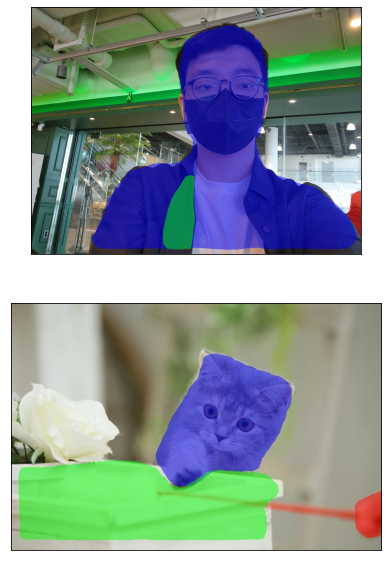

In [26]:
inSeg1 = cv2.imread('/content/drive/MyDrive/Exploration/9_Submit/data/myImage_inSeg.jpg')
inSeg2 = cv2.imread('/content/drive/MyDrive/Exploration/9_Submit/data/cat_inSeg.jpg')
showImage([inSeg1, inSeg2])

* 사람이 2명으로 나눠서 나오긴 했지만 영역은 깔끔하지 않았습니다.  
  (모델 자체의 성능차이 같습니다.)  
* 옷의 특정 부분이 다른 라벨로 인식되었습니다.
* 다른 모델을 쓰는 것이 더 좋을 것 같습니다.

## 회고

* 이번 프로젝트에서 어려웠던 점
    - 베이스가 없는 상태에서 논문 읽기
    - 환경에 맞는 새로운 모델 찾기
* 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
  * 알게 된 점
    - 최신 tensorflow 사용시 pixelLib가 batchnormalization을 잡지 못한다.(import 에러)
    - 이미지용 ndarray 생성시 0~255의 범위를 넘어가면 opencv가 다시 나눠서 4차원으로 계산합니다(출력시 에러).
    - CNN의 regular grid 개념(약간)
    - 생각보다 pytorch만 설명해놓은 모델들이 많다.
    - PixelLib의 instance segmentation 활용(MaskRCNN)
    - PointRend 기본적 구조
  * 아직 모호한 점
    - regular grid, adaptive selective 개념
* 루브릭 평가를 맞추기 위해 시도한 점
    - 각각의 그림에 대해 라벨을 표시
    - 관련 사이트 및 논문 참고